In [2]:
import pandas as pd
import numpy as np

In [3]:
urldata="http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
data = pd.read_csv(urldata,sep=" ",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [4]:
a=list(data.isna().sum())
a.sort()
print(a[len(a)-6:len(a)])

[1341, 1341, 1429, 1429, 1429, 1429]


<p><span style="color: #ff6600;"><strong>Replacing the null values with NA</strong></span></p>

In [5]:
for i in list(data):
    data[i] = data[i].fillna(data[i].mean())

In [6]:
##Define the mean Function
def mean(x):
    return x-np.mean(x)
data=data.apply(mean)

<p><span style="color: #ff6600;"><strong>Standardize the Data</strong></span></p>

In [9]:
for i in list(data):
    mean = data[i].mean()
    std = data[i].std()
    if std>0:
        data[i] = data[i].apply(lambda x:(x-mean)/std)

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.224237,0.849453,-0.436134,0.033544,-0.050564,0.0,-0.563610,0.266184,0.509664,1.128056,...,7.093813e-16,8.876476e-16,0.118661,-0.204825,-0.093178,-0.197050,-3.109218e-15,-2.865681e-15,-6.237301e-15,-1.883953e-15
1,1.106783,-0.382788,1.016812,0.153018,-0.060025,0.0,0.198154,0.322141,0.456854,0.022574,...,3.088356e-01,2.007239e+00,0.530034,0.406549,0.444564,0.384936,-9.598680e-01,4.117217e-01,2.500445e-01,1.156320e+00
2,-1.113803,0.798847,-0.481136,0.685994,-0.047891,0.0,-0.905921,0.254993,-0.260824,0.327078,...,4.808089e+00,-2.743940e-01,-1.262377,0.022257,0.014371,0.029823,2.990196e+00,3.625906e+00,3.320359e+00,-1.790914e-01
3,-0.350200,-0.198812,-0.051531,-1.106595,-0.051274,0.0,0.503085,-0.013598,0.343108,-0.765164,...,-5.092106e-01,-4.385298e-01,-0.322096,-0.292164,-0.362049,-0.283326,-1.018622e-01,-1.788704e-01,-3.081944e-01,-2.751580e-01
4,0.242065,0.087498,1.117030,-0.158869,-0.047477,0.0,-0.115345,0.187845,0.544871,-0.149536,...,7.093813e-16,8.876476e-16,-5.905014,26.858657,27.062785,26.904758,-1.018622e-01,-1.788704e-01,-3.081944e-01,-2.751580e-01


In [11]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1567.0,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,...,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03
mean,-3.124495e-17,9.210529e-18,-4.569840e-18,4.676115e-17,1.994877e-17,0.0,1.297976e-16,1.013158e-17,-6.972890e-17,3.421977e-17,...,-4.931176e-17,-2.457794e-16,-2.235325e-17,-1.850962e-17,1.134046e-16,-6.465083e-18,-2.287045e-16,1.778186e-16,1.256529e-16,1.030871e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.690945e+00,-4.201789e+00,-4.761160e+00,-3.175656e+00,-6.266169e-02,0.0,-3.057011e+00,-1.363338e+01,-3.681300e+00,-3.479222e+00,...,-2.247559e+00,-1.782692e+00,-6.551457e+00,-5.425362e-01,-5.771453e-01,-5.228917e-01,-3.104882e+00,-1.507703e+00,-1.494452e+00,-1.061880e+00
25%,-6.503470e-01,-5.355405e-01,-6.619044e-01,-7.106702e-01,-5.666915e-02,0.0,-5.113496e-01,-8.074529e-02,-6.988776e-01,-6.592497e-01,...,7.093813e-16,-1.162206e-01,-6.453174e-01,-2.164701e-01,-2.007260e-01,-2.128459e-01,-6.482338e-01,-6.672447e-01,-6.919837e-01,-5.891788e-01
50%,-3.555898e-02,3.813852e-02,1.389617e-02,-2.479410e-01,-5.133254e-02,0.0,6.108475e-02,6.474133e-02,-1.708426e-02,-3.038272e-02,...,7.093813e-16,8.876476e-16,3.050960e-02,-8.837276e-02,-6.629059e-02,-8.670279e-02,-7.757903e-02,-1.902279e-01,-2.384146e-01,-2.945504e-01
75%,5.727647e-01,5.346622e-01,5.959029e-01,4.407269e-01,-4.754487e-02,0.0,5.503209e-01,2.214192e-01,7.310604e-01,6.117235e-01,...,7.093813e-16,8.876476e-16,6.622609e-01,6.883765e-02,6.814487e-02,6.349751e-02,4.971229e-01,4.344368e-01,3.896043e-01,1.606576e-01
max,4.652889e+00,4.369929e+00,3.904552e+00,5.273135e+00,1.979107e+01,0.0,4.531819e+00,7.586006e-01,2.620718e+00,5.013792e+00,...,1.186374e+01,1.163841e+01,2.851353e+00,2.685866e+01,2.706279e+01,2.690476e+01,6.584107e+00,7.203531e+00,8.135170e+00,6.793326e+00


In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.224237,0.849453,-0.436134,0.033544,-0.050564,0.0,-0.563610,0.266184,0.509664,1.128056,...,7.093813e-16,8.876476e-16,0.118661,-0.204825,-0.093178,-0.197050,-3.109218e-15,-2.865681e-15,-6.237301e-15,-1.883953e-15
1,1.106783,-0.382788,1.016812,0.153018,-0.060025,0.0,0.198154,0.322141,0.456854,0.022574,...,3.088356e-01,2.007239e+00,0.530034,0.406549,0.444564,0.384936,-9.598680e-01,4.117217e-01,2.500445e-01,1.156320e+00
2,-1.113803,0.798847,-0.481136,0.685994,-0.047891,0.0,-0.905921,0.254993,-0.260824,0.327078,...,4.808089e+00,-2.743940e-01,-1.262377,0.022257,0.014371,0.029823,2.990196e+00,3.625906e+00,3.320359e+00,-1.790914e-01
3,-0.350200,-0.198812,-0.051531,-1.106595,-0.051274,0.0,0.503085,-0.013598,0.343108,-0.765164,...,-5.092106e-01,-4.385298e-01,-0.322096,-0.292164,-0.362049,-0.283326,-1.018622e-01,-1.788704e-01,-3.081944e-01,-2.751580e-01
4,0.242065,0.087498,1.117030,-0.158869,-0.047477,0.0,-0.115345,0.187845,0.544871,-0.149536,...,7.093813e-16,8.876476e-16,-5.905014,26.858657,27.062785,26.904758,-1.018622e-01,-1.788704e-01,-3.081944e-01,-2.751580e-01


In [8]:
data.cov()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,5399.400559,-847.962623,10.267101,-245.970944,-45.405664,0.0,1.035646,2.067116e-02,-0.285552,0.010041,...,-6.066123e-03,-69.110484,5.597825e-05,2.959760e-02,5.440450e-03,6.200032,1.674263e-02,-1.674407e-02,-5.931978e-03,28.787985
1,-847.962623,6436.498769,13.594268,-266.969225,-7.361905,0.0,-12.735089,-8.629407e-03,0.185194,0.029044,...,7.433350e-03,238.028542,1.189228e-02,4.001373e-03,-3.771269e-04,0.652159,-9.319956e-03,1.219673e-02,2.326527e-03,337.335304
2,10.267101,13.594268,863.239193,3861.989571,158.062336,0.0,-24.852093,-3.838581e-02,0.051050,0.007176,...,-7.127033e-04,-11.386061,-6.022054e-04,7.920632e-03,1.991518e-03,1.655425,-9.254264e-03,-7.591260e-03,-2.595219e-03,-90.702367
3,-245.970944,-266.969225,3861.989571,193347.392105,-1442.735482,0.0,-1872.534077,2.901858e-01,-3.341178,0.453118,...,-3.627321e-02,-1722.603401,1.344950e-02,1.920902e-01,4.045312e-02,40.923225,1.885597e-01,-1.515019e-01,-4.240256e-02,-3315.841083
4,-45.405664,-7.361905,158.062336,-1442.735482,3147.554015,0.0,-25.906708,-1.743227e-01,-0.107498,0.045941,...,-4.527014e-03,271.739456,8.607397e-03,-1.252378e-03,-3.331426e-04,-0.324302,-3.044745e-02,-1.531536e-02,-4.196877e-03,268.089156
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6,1.035646,-12.735089,-24.852093,-1872.534077,-25.906708,0.0,38.555045,7.306530e-04,0.040255,-0.004633,...,3.767420e-04,14.478876,-4.698872e-04,-4.201473e-03,-8.732434e-04,-0.877665,-3.161209e-03,1.860292e-03,5.735297e-04,25.513849
7,0.020671,-0.008629,-0.038386,0.290186,-0.174323,0.0,0.000731,7.984370e-05,0.000013,-0.000012,...,2.241661e-08,-0.031987,-9.097232e-07,1.577007e-06,2.883314e-07,0.000330,6.415202e-06,-1.685668e-06,-5.350811e-07,-0.090415
8,-0.285552,0.185194,0.051050,-3.341178,-0.107498,0.0,0.040255,1.328516e-05,0.005454,-0.000170,...,-1.677851e-06,-0.141414,-6.939380e-06,2.205655e-05,5.479811e-06,0.004735,9.518674e-06,1.485415e-05,5.556124e-06,-0.157835
9,0.010041,0.029044,0.007176,0.453118,0.045941,0.0,-0.004633,-1.242873e-05,-0.000170,0.000228,...,2.242493e-06,-0.003311,2.375643e-06,-9.349378e-06,-1.830694e-06,-0.001951,6.296537e-06,7.887571e-06,2.630672e-06,0.006919


<p><span style="color: #ff6600;"><strong>Calculating the Eigen Values and Vectors</strong></span></p>

In [10]:
from scipy.linalg import eigh
values,vectors=eigh(sigma)
print(vectors.shape)
print(values.shape)

NameError: name 'sigma' is not defined

In [16]:
var=values/np.sum(values)*100
components= list(range(len(var)))
cumulative_var = np.cumsum(var)

In [18]:
import matplotlib.pyplot as plt

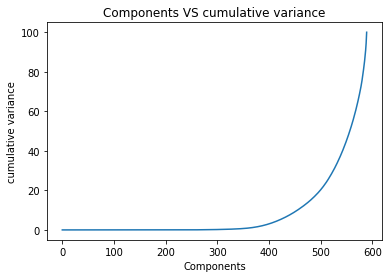

In [19]:
plt.plot(cumulative_var)
plt.xlabel("Components")
plt.ylabel("cumulative variance")
plt.title("Components VS cumulative variance")
plt.show()

## Top 7 Components

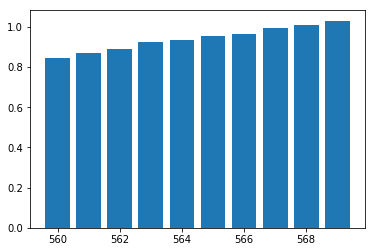

In [22]:
plt.bar(components[560:570],var[560:570])
plt.show()

In [9]:
Top = pd.DataFrame(data=vectors[:,563:570],columns=list(map(str,range(1,8,1))))
Top.head(15)

NameError: name 'vectors' is not defined

In [24]:
urlLabels="http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
labels = pd.read_csv(urlLabels,sep=" ",header=None)
labels.shape

(1567, 2)

In [25]:
mx,mn=vectors[len(vectors)-1],vectors[len(vectors)-2]
components = [mx,mn]
components = np.asarray(components)
print(components.shape)
data.T.shape

(2, 590)


(590, 1567)

In [26]:
new_coordinates = np.matmul(components,data.values.T) 
print(new_coordinates.T.shape)
temp_cor=new_coordinates.T
a=labels[0].values
print(len(np.transpose(a)))
print(len(temp_cor[:,0]),len(temp_cor[:,1]))
d={'Major':temp_cor[:,0],'Minor':temp_cor[:,1],'Labels':a}
z=pd.DataFrame(data=d)

(1567, 2)
1567
1567 1567


In [27]:
z.head()

,Major,Minor,Labels
0,0.282865,-0.143200,-1
1,0.276482,-0.803671,-1
2,1.284378,0.810208,1
3,2.785440,3.545105,-1
4,0.791793,-0.176696,-1


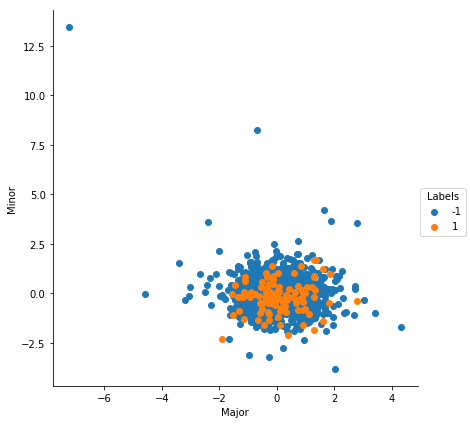

In [28]:
import seaborn as sns
sns.FacetGrid(z,hue='Labels',size=6).map(plt.scatter,'Major','Minor').add_legend()
plt.show()